# Problem statement
Fake News Detection
Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.


Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas.
For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.

# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

# Importing Dataset

In [2]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("true.csv")

In [3]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [4]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [5]:
df_true.tail(10)

,title,text,subject,date
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017"
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017"
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017"
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017"
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017"
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [6]:
print(df_true.shape,df_fake.shape)

(21417, 4) (23481, 4)


In [7]:
df_true.info

<bound method DataFrame.info of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuter

In [8]:
df_fake.info

<bound method DataFrame.info of                                                    title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was rev

In [9]:
df_fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
df_true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [11]:
# To find the data type of the dataset
for col in df_fake:
    print ('This column', col ,'has', df_fake[col].nunique(),'unique elements')
    print ('*'*100)

This column title has 17903 unique elements
****************************************************************************************************
This column text has 17455 unique elements
****************************************************************************************************
This column subject has 6 unique elements
****************************************************************************************************
This column date has 1681 unique elements
****************************************************************************************************


In [12]:
# To find the data type of the dataset
for col in df_true:
    print ('This column', col ,'has', df_true[col].nunique(),'unique elements')
    print ('*'*100)

This column title has 20826 unique elements
****************************************************************************************************
This column text has 21192 unique elements
****************************************************************************************************
This column subject has 2 unique elements
****************************************************************************************************
This column date has 716 unique elements
****************************************************************************************************


In [13]:
df_fake.describe(include='all')

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [14]:
df_true.describe(include='all')

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


# Data cleaning and preparation

In [15]:
# Add flag to track fake and real
df_fake['target'] = 0
df_true['target'] = 1

In [16]:
df_fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [17]:
df_true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [18]:
# Concatenate dataframes
data = pd.concat([df_fake,df_true]).reset_index(drop = True)
data.shape

(44898, 5)

In [19]:
data.head(10)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [20]:
data.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [21]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [22]:
# Check the data
data.head()

,title,text,subject,date,target
0,Kentucky Woman Brutally Beaten By Man For Loo...,Ever since the Supreme Court effectively legal...,News,"May 14, 2016",0
1,Hillary’s Latest Challenge To Progressives Is...,"Appearing on Face the Nation this past Sunday,...",News,"May 9, 2016",0
2,The Worst Possible Person Just Won Alabama’s ...,Alabama s Republican runoff election for Jeff ...,News,"September 26, 2017",0
3,Liberia party submits complaint over alleged v...,DAKAR (Reuters) - The Liberty Party that place...,worldnews,"October 23, 2017",1
4,‘DO SOMETHING!’: Trump Panics As Mueller’s In...,With news circulating that Robert Mueller will...,News,"October 29, 2017",0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [24]:
data.info

<bound method DataFrame.info of                                                    title  \
0       Kentucky Woman Brutally Beaten By Man For Loo...   
1       Hillary’s Latest Challenge To Progressives Is...   
2       The Worst Possible Person Just Won Alabama’s ...   
3      Liberia party submits complaint over alleged v...   
4       ‘DO SOMETHING!’: Trump Panics As Mueller’s In...   
...                                                  ...   
44893  JOHN MCCAIN ATTACKS President Trump From Hospi...   
44894      Truck bomb in northern Iraq kills at least 23   
44895  White House says Trump 'extremely concerned' a...   
44896  Germany's far-right AfD calls for repatriation...   
44897  Zimbabwe's Mnangagwa to be sworn in as preside...   

                                                    text       subject  \
0      Ever since the Supreme Court effectively legal...          News   
1      Appearing on Face the Nation this past Sunday,...          News   
2      Alabama s Republic

In [25]:
data.drop(['date','subject'],axis=1,inplace=True)

In [26]:
data.head()

,title,text,target
0,Kentucky Woman Brutally Beaten By Man For Loo...,Ever since the Supreme Court effectively legal...,0
1,Hillary’s Latest Challenge To Progressives Is...,"Appearing on Face the Nation this past Sunday,...",0
2,The Worst Possible Person Just Won Alabama’s ...,Alabama s Republican runoff election for Jeff ...,0
3,Liberia party submits complaint over alleged v...,DAKAR (Reuters) - The Liberty Party that place...,1
4,‘DO SOMETHING!’: Trump Panics As Mueller’s In...,With news circulating that Robert Mueller will...,0


In [27]:
data['Input']=data['title']+data['text']

In [28]:
data.drop(columns=['title','text'], inplace=True)

In [29]:
data.head()

,target,Input
0,0,Kentucky Woman Brutally Beaten By Man For Loo...
1,0,Hillary’s Latest Challenge To Progressives Is...
2,0,The Worst Possible Person Just Won Alabama’s ...
3,1,Liberia party submits complaint over alleged v...
4,0,‘DO SOMETHING!’: Trump Panics As Mueller’s In...


In [30]:
#converting all the text to lower form
data['Input'] = data['Input'].str.lower()

In [31]:
data.head(1)

,target,Input
0,0,kentucky woman brutally beaten by man for loo...


In [32]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [34]:
#Replacing '\n' in comment_text
data['Input'] = data['Input'].replace('\n',' ')

In [35]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [36]:
# Calling the above function for the column comment_text in training dataset to replace original with cleaned text
data['Input'] = data['Input'].apply(clean_comments)
data['Input'].head()

0    kentucky woman brutally beaten man looking mas...
1    hillary latest challenge progressive one need ...
2    worst possible person alabama runoff u senate ...
3    liberia party submits complaint alleged vote f...
4    something trump panic mueller investigation cl...
Name: Input, dtype: object

In [37]:
# Creating a column 'length_before_cleaning' in training dataset
# It represents the length of the each comment respectively in a column 'comment_text' 
data['length_after_cleaning'] = data['Input'].map(lambda comment_text: len(comment_text))
data

,target,Input,length_after_cleaning
0,0,kentucky woman brutally beaten man looking mas...,1838
1,0,hillary latest challenge progressive one need ...,1612
2,0,worst possible person alabama runoff u senate ...,2973
3,1,liberia party submits complaint alleged vote f...,1231
4,0,something trump panic mueller investigation cl...,2092
...,...,...,...
44893,0,john mccain attack president trump hospital be...,1779
44894,1,truck bomb northern iraq kill least kirkuk ira...,772
44895,1,white house say trump extremely concerned wiki...,467
44896,1,germany far right afd call repatriation syrian...,1951


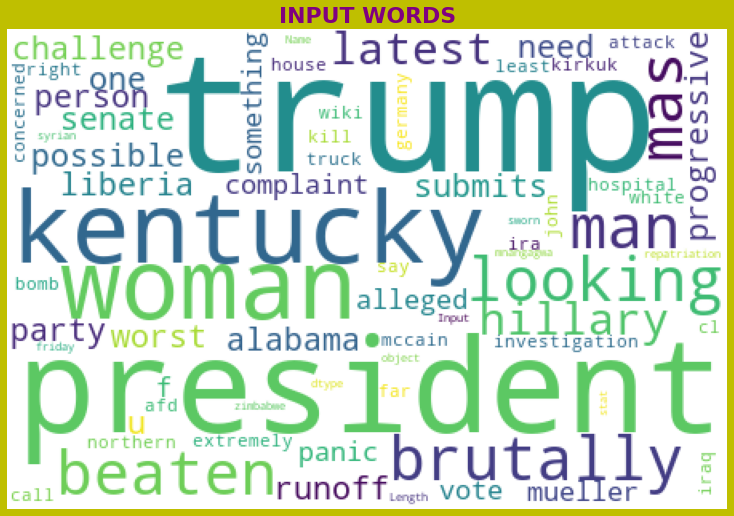

In [67]:
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(data['Input']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='INPUT WORDS',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

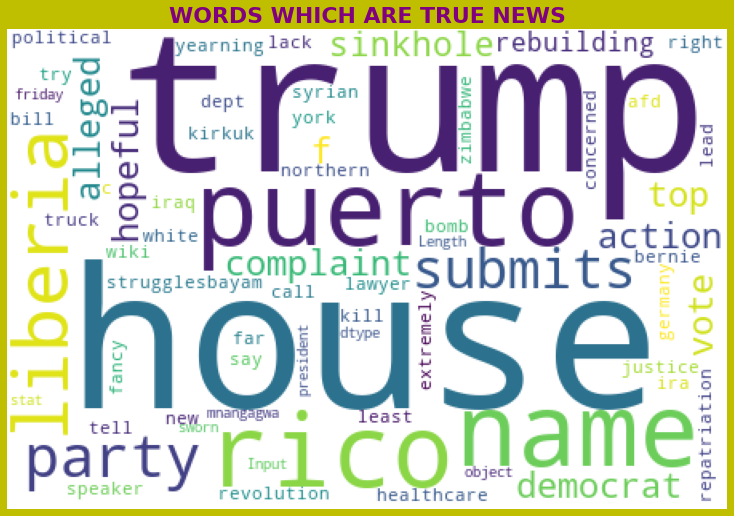

In [39]:
# Plotting for malignant
df_true=data[(data['target']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_true['Input']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS WHICH ARE TRUE NEWS',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

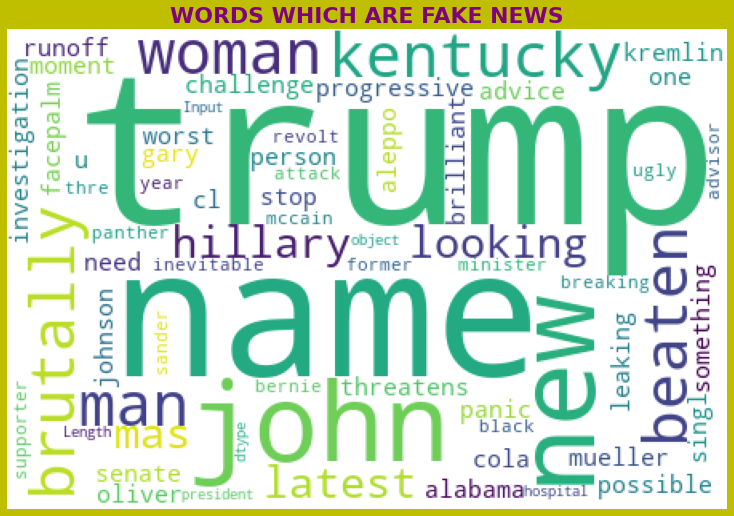

In [40]:
# Plotting for malignant
df_false=data[(data['target']==0)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_false['Input']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS WHICH ARE FAKE NEWS',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

# Basic data exploration

# Modeling

In [69]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 2000, stop_words='english')

In [70]:
# Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(data['Input']).toarray()

In [43]:
y=data['target']

In [44]:
y = data['target'].values

In [45]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Split Data

In [46]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [47]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score    
# spam classifier --> less false positive

In [48]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [49]:
gnb.fit(X_train, y_train)  # low precision model 
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8979955456570156
[[4287  428]
 [ 488 3777]]
0.8982164090368608


In [50]:
mnb.fit(X_train, y_train)   
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9203786191536748
[[4424  291]
 [ 424 3841]]
0.9295740561471443


In [51]:
bnb.fit(X_train, y_train)  # high precision model and better accuracy
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9565701559020044
[[4535  180]
 [ 210 4055]]
0.9574970484061394


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,roc_auc_score,precision_score,f1_score,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [53]:
Model = []
score = []
cvs = []
rocscore = []

LogisticRegression()


Accuracy_score =  0.9866369710467706


Cross_Val_Score =  0.9867254774229111


roc_auc_score =  0.9867040288222343


classification_report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4715
           1       0.98      0.99      0.99      4265

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



[[4646   69]
 [  51 4214]]
AxesSubplot(0.125,0.808774;0.62x0.0712264)


Text(0.5, 0, 'False Positive Rate')

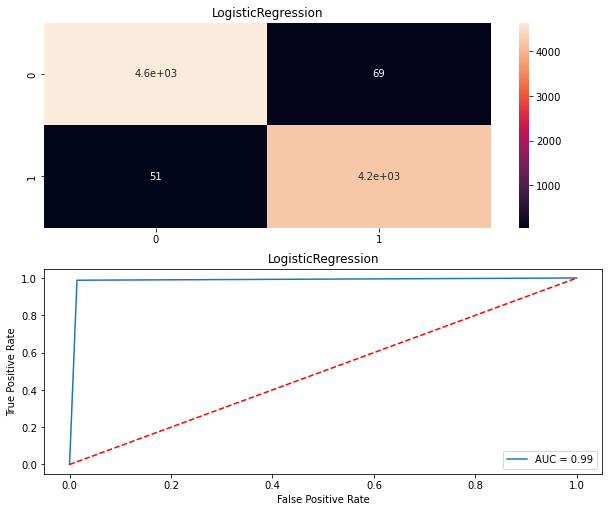

In [54]:

# Logistic Regression
name = "LogisticRegression"
model = LogisticRegression()

Model.append(name)
model.fit(X_train,y_train)
print(model)
pre=model.predict(X_test)
print('\n')

AS=accuracy_score(y_test,pre)
print('Accuracy_score = ',AS)
score.append(AS*100)
print('\n')

sc = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
cvs.append(sc*100)
print('\n')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ('roc_auc_score = ',roc_auc)
rocscore.append(roc_auc*100)
print('\n')

print('classification_report\n',classification_report(y_test,pre))
print('\n')

cm=confusion_matrix(y_test,pre)
print(cm)

plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title(name)
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title(name)
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

DecisionTreeClassifier()


Accuracy_score =  0.994543429844098


Cross_Val_Score =  0.9959909275879022


roc_auc_score =  0.9944793436924634


classification_report
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4715
           1       1.00      0.99      0.99      4265

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



[[4695   20]
 [  29 4236]]
AxesSubplot(0.125,0.808774;0.62x0.0712264)


Text(0.5, 0, 'False Positive Rate')

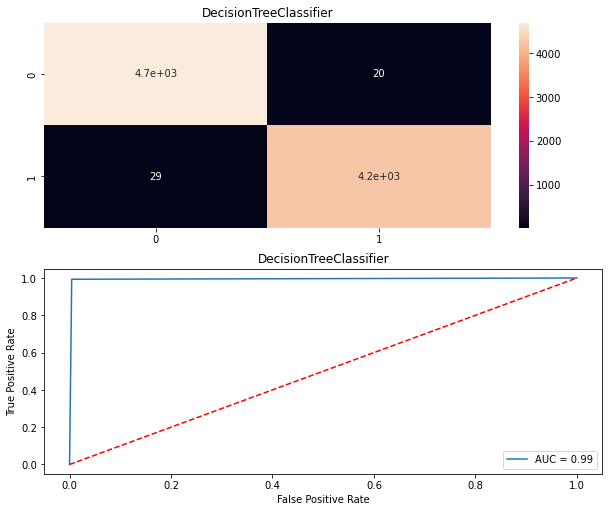

In [55]:
name = "DecisionTreeClassifier"
model = DecisionTreeClassifier()

Model.append(name)
model.fit(X_train,y_train)
print(model)
pre=model.predict(X_test)
print('\n')

AS=accuracy_score(y_test,pre)
print('Accuracy_score = ',AS)
score.append(AS*100)
print('\n')

sc = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
cvs.append(sc*100)
print('\n')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ('roc_auc_score = ',roc_auc)
rocscore.append(roc_auc*100)
print('\n')

print('classification_report\n',classification_report(y_test,pre))
print('\n')

cm=confusion_matrix(y_test,pre)
print(cm)

plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title(name)
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title(name)
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

MultinomialNB()


Accuracy_score =  0.9203786191536748


Cross_Val_Score =  0.9242729592406282


roc_auc_score =  0.9194341224721182


classification_report
               precision    recall  f1-score   support

           0       0.91      0.94      0.93      4715
           1       0.93      0.90      0.91      4265

    accuracy                           0.92      8980
   macro avg       0.92      0.92      0.92      8980
weighted avg       0.92      0.92      0.92      8980



[[4424  291]
 [ 424 3841]]
AxesSubplot(0.125,0.808774;0.62x0.0712264)


Text(0.5, 0, 'False Positive Rate')

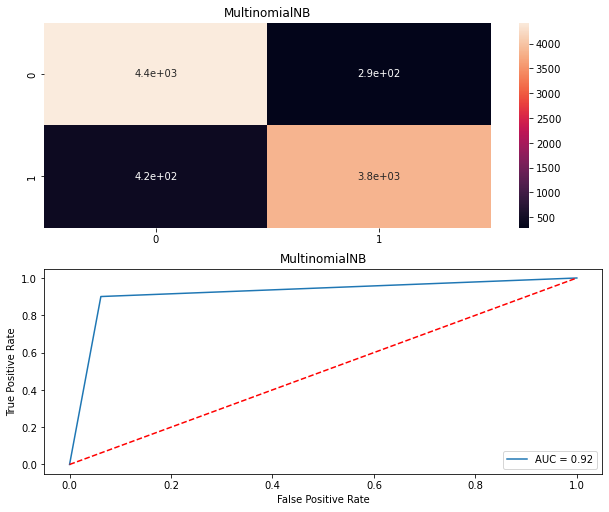

In [56]:
name = "MultinomialNB"
model = MultinomialNB()

Model.append(name)
model.fit(X_train,y_train)
print(model)
pre=model.predict(X_test)
print('\n')

AS=accuracy_score(y_test,pre)
print('Accuracy_score = ',AS)
score.append(AS*100)
print('\n')

sc = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
cvs.append(sc*100)
print('\n')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ('roc_auc_score = ',roc_auc)
rocscore.append(roc_auc*100)
print('\n')

print('classification_report\n',classification_report(y_test,pre))
print('\n')

cm=confusion_matrix(y_test,pre)
print(cm)

plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title(name)
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title(name)
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

RandomForestClassifier()


Accuracy_score =  0.9973273942093541


Cross_Val_Score =  0.9979508980378167


roc_auc_score =  0.9973206660044581


classification_report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4715
           1       1.00      1.00      1.00      4265

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



[[4703   12]
 [  12 4253]]
AxesSubplot(0.125,0.808774;0.62x0.0712264)


Text(0.5, 0, 'False Positive Rate')

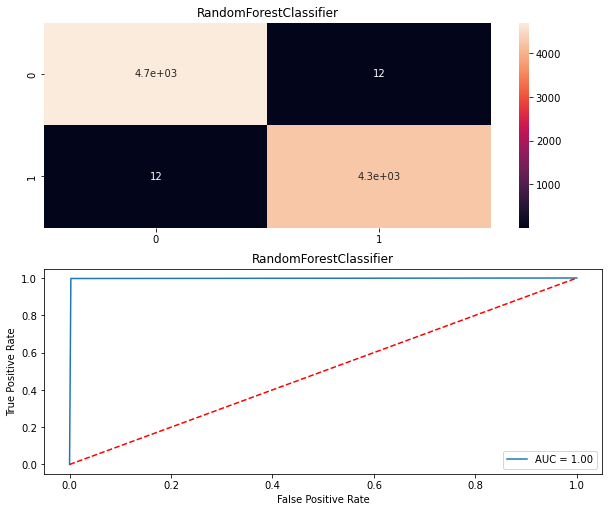

In [57]:
name = "RandomForestClassifier"
model = RandomForestClassifier()

Model.append(name)
model.fit(X_train,y_train)
print(model)
pre=model.predict(X_test)
print('\n')

AS=accuracy_score(y_test,pre)
print('Accuracy_score = ',AS)
score.append(AS*100)
print('\n')

sc = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
cvs.append(sc*100)
print('\n')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ('roc_auc_score = ',roc_auc)
rocscore.append(roc_auc*100)
print('\n')

print('classification_report\n',classification_report(y_test,pre))
print('\n')

cm=confusion_matrix(y_test,pre)
print(cm)

plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title(name)
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title(name)
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [58]:
len(Model)

4

In [59]:
Model

['LogisticRegression',
 'DecisionTreeClassifier',
 'MultinomialNB',
 'RandomForestClassifier']

In [60]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result.sort_values(by='Accuracy_score', ascending=False)

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
3,RandomForestClassifier,99.732739,99.795090,99.732067
1,DecisionTreeClassifier,99.454343,99.599093,99.447934
0,LogisticRegression,98.663697,98.672548,98.670403
2,MultinomialNB,92.037862,92.427296,91.943412


Key observation:
    
Among our model we have Random Forest tops the chart.

accuracy = 99.810690

Crossvalidation score=99.783954

roc score= 99.808732


# Hyper Parameter Tuning

In [61]:
clf_rf =  RandomForestClassifier(random_state=42)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [62]:
y_pred_prob=clf_rf.predict_proba(X_test)
y_pred_prob

array([[0.75, 0.25],
       [0.73, 0.27],
       [0.04, 0.96],
       ...,
       [0.22, 0.78],
       [0.13, 0.87],
       [0.28, 0.72]])

In [63]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [64]:
param_grid = [
    {"n_estimators": range(20, 200, 20), 
     "bootstrap": [True, False],
     "criterion": ["gini", "entropy"],   
     "max_depth": [2, 4, 6, 8, 10, 12, 14, None],
     "max_features": ["auto", "sqrt", "log2"], 
     "min_samples_split": [2, 5, 10],
     "min_samples_leaf": [1, 2, 4],
     }
]

clf_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [65]:
clf_random = GridSearchCV(clf_rf, param_grid, cv=3,
                           scoring="f1_weighted", verbose=2, n_jobs=-1)

In [ ]:
clf_random.fit(X_train, y_train)

In [ ]:
clf_random.best_params_

In [ ]:
clf_random.best_score_

In [74]:
preds = cross_val_predict(clf_random.best_estimator_, X_train, y_train, cv=5, n_jobs=-1)
print(metrics.classification_report(y_train, preds, zero_division=0))

NameError: name 'cross_val_predict' is not defined

In [71]:
import pickle
pickle.dump(tf_vec, open('vecotizer.pkl','wb'))
pickle.dump(clf_rf, open('model.pkl', 'wb'))